# Assignment 1
## Aliza Muslimah
## Kelas PYTN-07

## VISUALIZATION

In [1]:
# Meng-Import Library
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from PIL import Image as img
from wordcloud import WordCloud, STOPWORDS
print('Libraries are imported!')

Libraries are imported!


In [2]:
# Membaca dataset
df_lon = pd.read_csv('../dataset/london_crime_by_lsoa.csv.zip', skipinitialspace=True, dtype={'year':str, 'month':str})
print('Data read into a pandas dataFrame!')

Data read into a pandas dataFrame!


In [3]:
df_lon.shape

(13490604, 7)

In [4]:
# Menampilkan informasi dari dataFrame
df_lon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            object
 6   month           object
dtypes: int64(1), object(6)
memory usage: 720.5+ MB


In [5]:
#menampilkan list header kolom
df_lon.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [6]:
# Menampilkan dataset
df_lon 

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [7]:
# Pilih Style
mpl.style.use(['ggplot'])

%matplotlib inline

In [8]:
# Menampilkan informasi tahun
df_lon['year'].unique()

array(['2016', '2015', '2008', '2012', '2010', '2013', '2014', '2011',
       '2009'], dtype=object)

In [9]:
df_new = df_lon[df_lon['value']!=0]
df_new

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


# Line Plot
**Pertanyaan** : Berapa jumlah kriminalitas di Sutton dari tahun 2008 - 2016?

In [10]:
# filtering data
sutt = df_new.loc[df_new['borough']== 'Sutton', ['value','year']].groupby('year').sum()
sutt

,value
year,
2008,12943
2009,12240
2010,12032
2011,11068
2012,10948
2013,10057
2014,10443
2015,10598
2016,10658


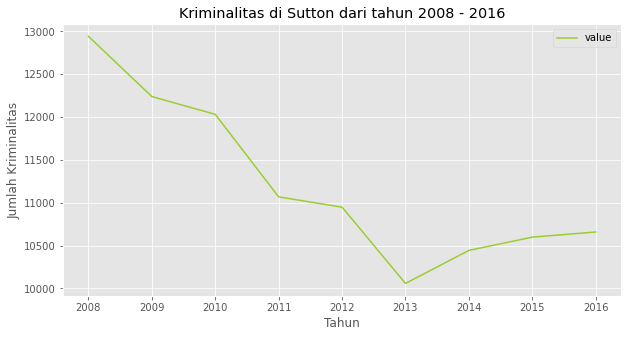

In [11]:
# set plot
sutt.plot(kind = 'line', stacked = False, color = 'yellowgreen',
             figsize=(10,5));

#menambahkan judul plot 
plt.title('Kriminalitas di Sutton dari tahun 2008 - 2016')

#menambahkan keterangan di sumbu-y
plt.ylabel('Jumlah Kriminalitas')

#menambahkan keterangan di sumbu-x
plt.xlabel('Tahun') 

plt.show()

**Analisis** : Berdasarkan line plot diatas, dapat diketahui bahwa jumlah kriminalitas di Sutton sempat menurun dari tahun 2008 menuju tahun 2013. Namun setelah itu, jumlahnya naik lagi ke tahun 2016.

# Area Plot
**Pertanyaan** : Bagaimana gambaran area plot dari jumlah kriminalitas di Sutton dari tahun 2008 - 2016?

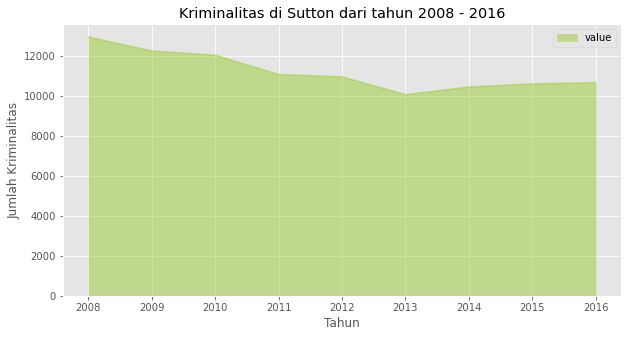

In [13]:
# set plot
sutt.plot(kind = 'area', stacked = False, color = 'yellowgreen',
             figsize=(10,5));

#menambahkan judul plot
plt.title('Kriminalitas di Sutton dari tahun 2008 - 2016')

#menambahkan keterangan di sumbu-y
plt.ylabel('Jumlah Kriminalitas')

#menambahkan keterangan di sumbu-x
plt.xlabel('Tahun') 

plt.show()

**Analisis** : Berdasarkan area
plot diatas, dapat diketahui bahwa jumlah kriminalitas di Sutton sempat menurun dari tahun 2008 menuju tahun 2013. Namun setelah itu, jumlahnya naik lagi ke tahun 2016.

# Bar Plot 

**Pertanyaan** : Berapakah jumlah kriminalitas di Brent dari tahun 2008-2016?

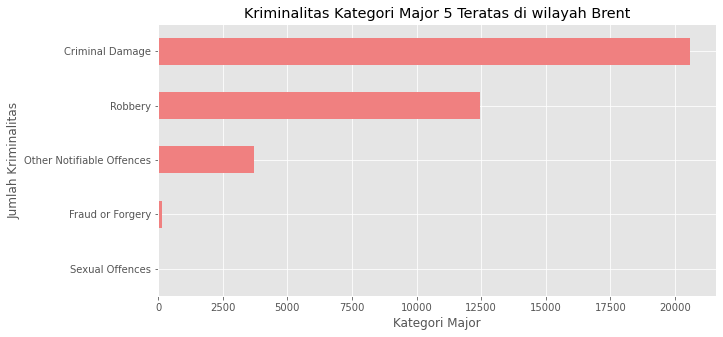

In [14]:
#filtering data
df_brent = df_new.loc[(df_new['borough']=='Brent')]   

# membuat dataframe berdasarkan kriminalitas kategori major 5 teratas 
df_new_head = df_brent.groupby('major_category', axis=0).sum().sort_values(by=['value'], ascending = True).head()

# set plot
df_new_head['value'].plot(kind = 'barh', stacked = False, color = 'lightcoral',
             figsize=(10,5));

#menambahkan judul plot
plt.title('Kriminalitas Kategori Major 5 Teratas di wilayah Brent')

#menambahkan keterangan di sumbu-y
plt.ylabel('Jumlah Kriminalitas')

#menambahkan keterangan di sumbu-x
plt.xlabel('Kategori Major') 

plt.show()

**Analisis** : Berdasarkan bar plot diatas, dapat diketahui bahwa jumlah kriminalitas kategori mayor 5 teratas di wilayah Brent adalah Criminal Damage, Robbery, Othe Notifiable Offences, Fraud of Forgery, dan Sexual Offences.

# Scatter Plot
**Pertanyaan** : Bagaimana gambaran scatter plot dari jumlah kriminalitas di Sutton dari tahun 2008 - 2016?

In [15]:
# mengcopy data frame sutt
sutt2 = sutt.copy()

# Mereset index dataframe
sutt2.index = map(int, sutt2.index) 
sutt2.reset_index(inplace=True)
sutt2.columns = ['year', 'value']
sutt2

,year,value
0,2008,12943
1,2009,12240
2,2010,12032
3,2011,11068
4,2012,10948
5,2013,10057
6,2014,10443
7,2015,10598
8,2016,10658


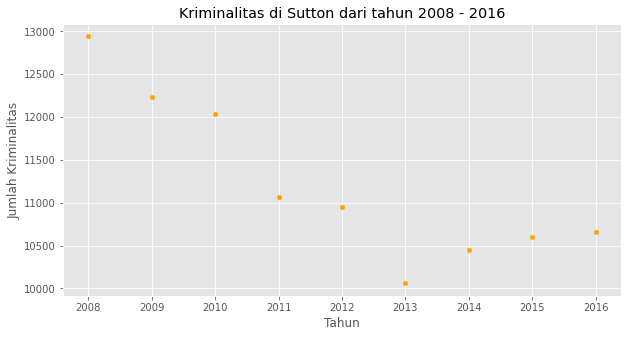

In [16]:
# set plot
sutt2.plot(kind = 'scatter', x='year', y='value', stacked = False, color = 'orange',
             figsize=(10,5));

#menambahkan judul plot
plt.title('Kriminalitas di Sutton dari tahun 2008 - 2016')

#menambahkan keterangan di sumbu-y
plt.ylabel('Jumlah Kriminalitas')

#menambahkan keterangan di sumbu-x
plt.xlabel('Tahun') 

plt.show()

**Analisis** : Berdasarkan scatter plot diatas, dapat diketahui bahwa jumlah kriminalitas di Sutton sempat menurun dari tahun 2008 menuju tahun 2013. Namun setelah itu, jumlahnya naik lagi ke tahun 2016

# Histogram

**Pertanyaan** : Bagaimana sebaran kriminalitas di London per wilayah pada tahun 2008 - 2016?

In [18]:
# fitering data
df_bor = df_new.groupby('borough', axis=0).sum()
df_bor 

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


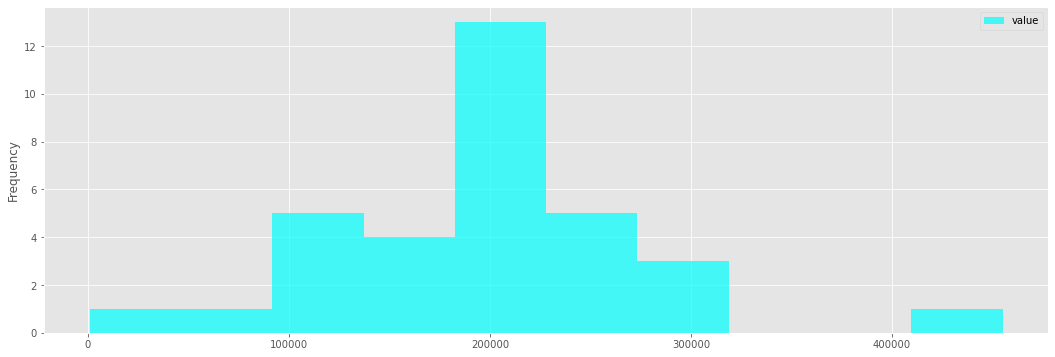

In [19]:
# set histogram
count, bin_edges = np.histogram(df_bor, bins=10)

df_bor.plot(kind = 'hist',
             alpha=0.7,
             bins=10,
             color='aqua',
             figsize=(18,6));
plt.show()

**Analisis** : Berdasarkan histogram diatas, dapat diketahui bahwa sebaran kriminalitas di London per wilayah pada tahun 2008 - 2016 berdistribusi normal

# Pie Chart
**Pertanyaan** : Bagaimana persentase kejahatan di Kota London Tahun 2008-2016?

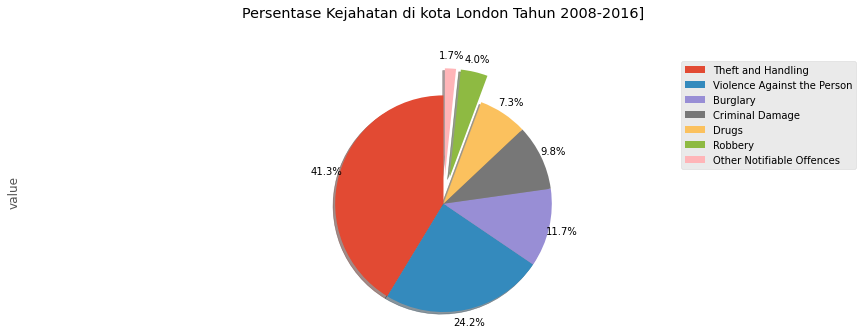

In [21]:
# filtering data
df_new_major_sort7 = df_new.groupby('major_category', axis=0).sum().sort_values(by=['value'], ascending = False).head(7)

# menginisiasii index yang akan di gunakan sebagai labels
major = df_new_major_sort7.index

df_new_major_sort7['value'].plot(kind='pie',
                           figsize = (15,5),
                           autopct= '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance= 1.12,
                            explode = (0, 0, 0, 0, 0, 0.25, 0.25)
                        )

plt.title("Persentase Kejahatan di kota London Tahun 2008-2016]", y=1.12)
plt.axis('equal')
plt.legend(labels=major, loc='upper right')
plt.show() 

**Analisis** : Berdasarkan pie chart diatas, dapat diketahui bahwa persentase kejahatan kategori major di Kota London Tahun 2008-2016 terbesar adalah 41.3% yaitu Theft and Handling

# Boxplot
**Pertanyaan** : Bagaimana gambaran boxplot jumlah kejahatan per wilayah di Kota London tahun 2008 - 2016?

Text(0.5, 1.0, 'Kejahatan per Wilayah di Kota London Tahun 2008 - 2016')

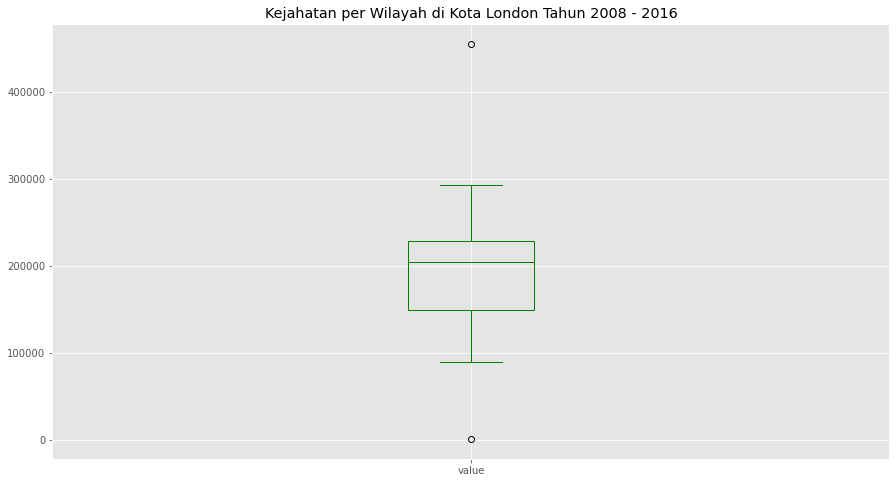

In [22]:
df_bor['value'].plot(kind = 'box',
             stacked = False,
             color = 'green',
             figsize=(15,8))

#menambahkan judul
plt.title('Kejahatan per Wilayah di Kota London Tahun 2008 - 2016')

**Analisis** : Berdasarkan boxplot diatas, dapat diketahui bahwa sebaran kriminalitas di London per wilayah pada tahun 2008 - 2016 berdistribusi normal

# Word Cloud
**Pertanyaan** : Wilayah apa saja yang ada pada dataset? 

In [23]:
# filtering data 
df_word = df_new[df_new['year']=='2016']
df_word

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
112,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
224,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11
...,...,...,...,...,...,...,...
13490419,E01001661,Greenwich,Violence Against the Person,Assault with Injury,2,2016,1
13490439,E01002200,Harrow,Violence Against the Person,Common Assault,3,2016,3
13490458,E01001862,Hammersmith and Fulham,Theft and Handling,Theft/Taking Of Motor Vehicle,2,2016,4
13490469,E01003783,Redbridge,Drugs,Possession Of Drugs,5,2016,3


In [24]:
# Menghapus kolom yang tidak dibutuhkan
df_word.drop(['month','lsoa_code','year','major_category','minor_category','value'], axis=1, inplace=True)
df_word 

C:\Users\Lenovo 120s\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,borough
9,Sutton
32,Bromley
64,Southwark
112,Havering
224,Redbridge
...,...
13490419,Greenwich
13490439,Harrow
13490458,Hammersmith and Fulham
13490469,Redbridge


In [25]:
# Memasukkan data frame df_word ke dalam file txt
df_word.to_csv('df_word.txt', sep='\t') 

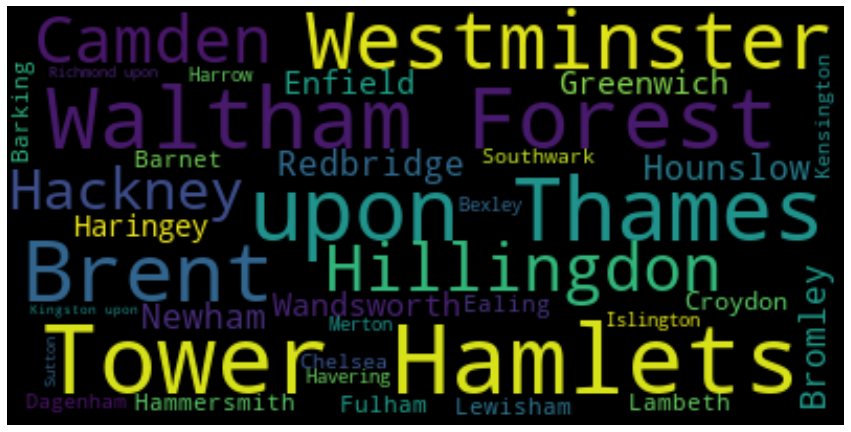

In [26]:
# Membaca file df_word.txt
df_word_read = open('df_word.txt', 'r').read()

# set stopwords
stopwords = set(STOPWORDS)

# menghapus kata borough
stopwords.add('borough')

# inisiasi wordcloud
bor_2016 = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
)

# generate wordcloud
bor_2016.generate(df_word_read)

plt.figure(figsize=(15,8))
plt.imshow(bor_2016, interpolation='bilinear')
plt.axis('off')

**Analisis** : Berdasarkan wordclouds diatas, dapat diketahui wilayah apa saja yang ada di dataset dengan tingkat ukuran font menunjukkan banyaknya jumlah kata yang ada pada dataset. Artinya, semakin besar ukuran font, semakin banyak kata yang ada pada dataset.